In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
filepath="C:\\zsofia\\Amsterdam\\GitHub\\eecolidar_kzs\\Annotation\\Data\\"

speciestable=pd.read_csv(filepath+'speciestable.csv',sep=';',encoding='latin-1')
plottable=pd.read_csv(filepath+'plottable.csv',sep=';',encoding='latin-1')
observationtable=pd.read_csv(filepath+'observationtable.csv',sep=';',encoding='latin-1')

1.) Introduce filters

In [1]:
observationtable_up2007=observationtable[(observationtable["year"]>2007)]

joined_obsplot=pd.merge(observationtable_up2007, plottable, on='polygonID', how='left')
joined_obsplot = joined_obsplot[list(joined_obsplot.columns[~joined_obsplot.columns.duplicated()])]
joined_obsplot_forest=joined_obsplot[(joined_obsplot["habitat"]=="Forest")]

joined_db=pd.merge(joined_obsplot_forest, speciestable, on='speciesKey', how='left')
joined_db.dtypes

joined_db.to_excel(filepath+'joined_db.xlsx',encoding='latin-1',index=False)


NameError: name 'observationtable' is not defined

2.) Select specific species and filter based on that

In [1]:
joined_db_betulapendula=joined_db[(joined_db["species"]=="Pinus sylvestris") & 
                                  (joined_db["organismQuantity"]<88) & (joined_db["organismQuantity"]>50)]
print(joined_db_betulapendula.shape)

joined_db_betulapendula_all=pd.merge(joined_db, joined_db_betulapendula[["polygonID"]], on='polygonID', how='right')
print(joined_db_betulapendula_all.shape)

NameError: name 'joined_db' is not defined

In [76]:
specieslist=joined_db_betulapendula_all.groupby('polygonID')['species'].apply(list).reset_index()
coveragelist=joined_db_betulapendula_all.groupby('polygonID')['organismQuantity'].apply(list).reset_index()

ForInfoBSc_lists=pd.merge(specieslist, coveragelist, on='polygonID', how='left')

ForInfoBSc_betulapendula=pd.merge(ForInfoBSc_lists, plottable[['polygonID','footprintWKT']], on='polygonID', how='left')

ForInfoBSc_betulapendula.to_csv(filepath+'ForInfoBSc_pinussylvestris_5088.csv',sep=";",index=False)

Print out the species composition of a selected plot

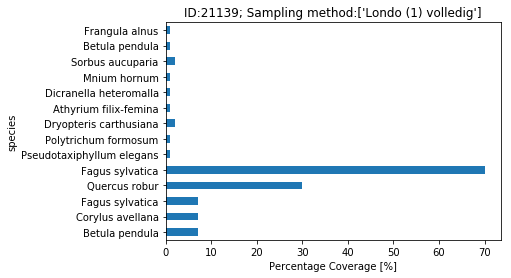

polygonID                          int64
eventID                           object
speciesKey                        object
year                               int64
month                              int64
day                                int64
eventDate                         object
organismQuantity                 float64
organismQuantityType              object
footprintWKT                      object
decimalLatitude                  float64
decimalLongitude                 float64
coordinateUncertaintyInMeters    float64
habitat                           object
samplingProtocol                  object
sampleSizeUnit                    object
polyarea                         float64
kingdom                           object
phylum                            object
class                             object
order                             object
family                            object
genus                             object
specificEpithet                   object
vernacularName  

In [34]:
ID=21139

selID=joined_db[(joined_db["polygonID"]==ID)]

selID.set_index(["species"],inplace=True)

selID["organismQuantity"].plot.barh(stacked=True)
plt.xlabel('Percentage Coverage [%]')
plt.title('ID:'+str(ID)+'; Sampling method:'+str(selID['samplingProtocol'].unique()))
plt.show()

selID.dtypes